Exercises
Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can .
Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?
Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.
Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?
Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [1]:
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pydataset
from sklearn.model_selection import train_test_split
import prepare
np.random.seed(123)


In [79]:
df= prepare.clean_telco()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  mont

In [81]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,monthly_charges,total_charges,churn,contract_type,years_tenure,has_streaming,is_family,has_phones,has_security_features,is_churn
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,59.90,542.4,No,Month-to-month,0.750000,False,False,True,False,0
1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,73.90,280.85,Yes,Month-to-month,0.333333,False,False,True,False,1
2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,98.00,1237.85,Yes,Month-to-month,1.083333,True,True,True,False,1
3,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,83.90,267.4,Yes,Month-to-month,0.250000,True,True,True,False,1
4,0013-MHZWF,Female,0,No,Yes,9,Yes,No,No,No,...,69.40,571.45,No,Month-to-month,0.750000,True,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9964-WBQDJ,Female,0,Yes,No,71,Yes,Yes,No internet service,No internet service,...,24.40,1725.4,No,Two year,5.916667,False,True,True,False,0
7039,9972-EWRJS,Female,0,Yes,Yes,67,Yes,No,No internet service,No internet service,...,19.25,1372.9,No,Two year,5.583333,False,True,True,False,0
7040,9975-GPKZU,Male,0,Yes,Yes,46,Yes,No,No internet service,No internet service,...,19.75,856.5,No,Two year,3.833333,False,True,True,False,0
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,67.85,4627.65,No,Two year,5.583333,False,True,True,True,0


In [82]:
df['total_charges'] = pd.to_numeric(df['total_charges'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  mont

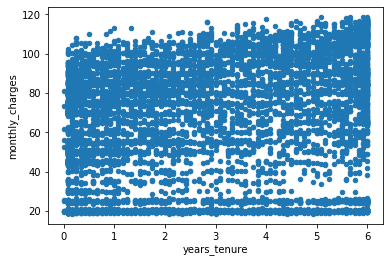

In [22]:
df.plot.scatter(y='monthly_charges', x='years_tenure')

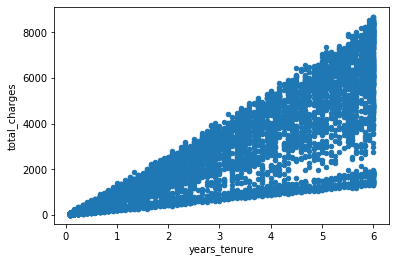

In [70]:
df.plot.scatter(y='total_charges', x='years_tenure')

In [10]:
print(df.total_charges.describe())

count     7043
unique    6531
top           
freq        11
Name: total_charges, dtype: object


In [27]:
train_and_validate, test = train_test_split(df, test_size=.12, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.12, random_state=123)

In [28]:
train.shape, test.shape, validate.shape

((5453, 25), (846, 25), (744, 25))

Visualizing Scalers

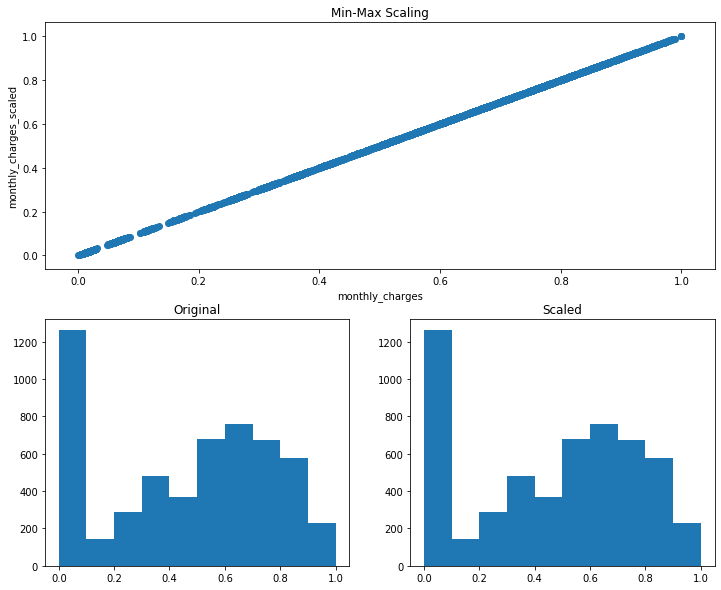

In [74]:
visualize_scaler(sklearn.preprocessing.MinMaxScaler(), 'Min-Max Scaling')

In [29]:
# 1. create the object
scaler = sklearn.preprocessing.MinMaxScaler()

In [30]:
# 2. fit the object
scaler.fit(train[['monthly_charges']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [33]:
# 3. use the object
train['monthly_charges_scaled'] = scaler.transform(train[['monthly_charges']])
test['monthly_charges_scaled'] = scaler.transform(test[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler.transform(validate[['monthly_charges']])

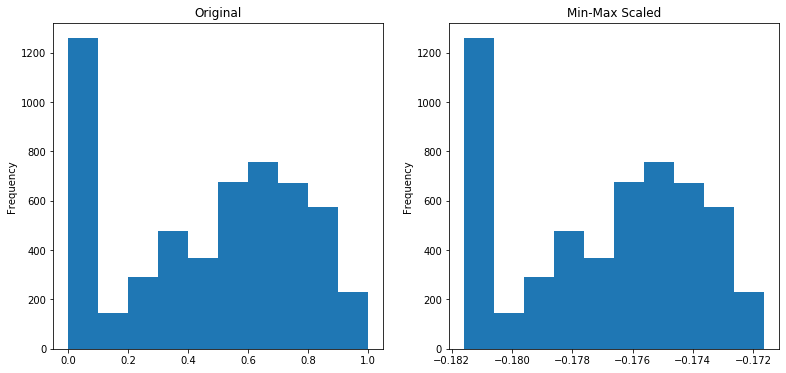

In [34]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Original')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Min-Max Scaled')

In [36]:
scaler = sklearn.preprocessing.StandardScaler()
# 2. fit the object
scaler.fit(train[['monthly_charges']])
# 3. use the object
train['monthly_charges_scaled'] = scaler.transform(train[['monthly_charges']])
test['monthly_charges_scaled'] = scaler.transform(test[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler.transform(validate[['monthly_charges']])

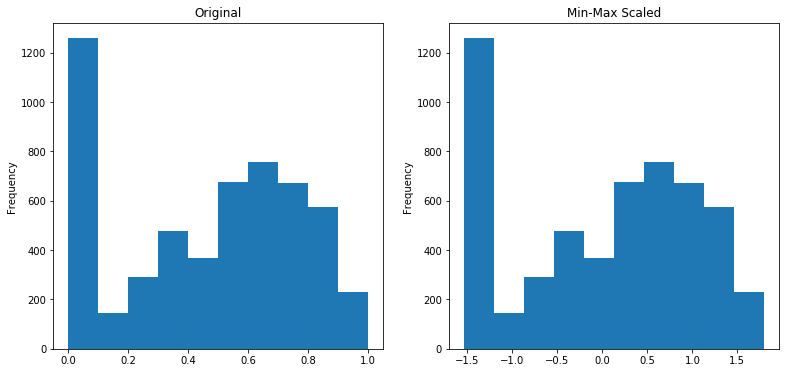

In [37]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Original')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Min-Max Scaled')

non-linear scaler

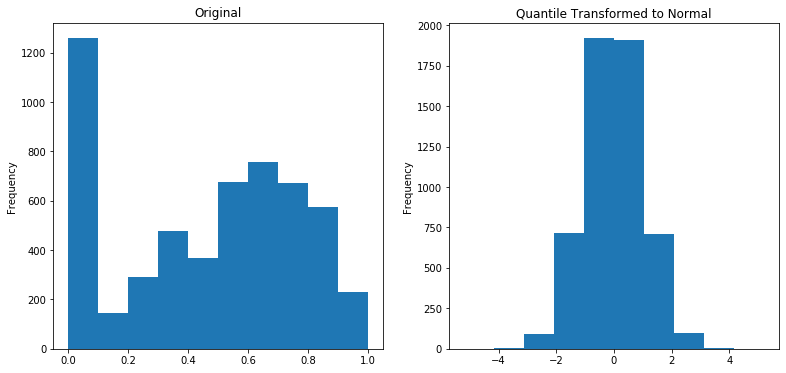

In [39]:
# 1. create the object
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
# 2. fit the object
scaler.fit(train[['monthly_charges']])
# 3. use the object
train['monthly_charges_scaled'] = scaler.transform(train[['monthly_charges']])
test['monthly_charges_scaled'] = scaler.transform(test[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler.transform(validate[['monthly_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Original')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Quantile Transformed to Normal')

In [42]:
train = train.drop(columns='monthly_charges_scaled')

In [43]:
def add_scaled_columns(train, validate, test, scaler, columns_to_scale):
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    scaler.fit(train[columns_to_scale])

    train = pd.concat([
        train,
        pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=new_column_names, index=train.index),
    ], axis=1)
    validate = pd.concat([
        validate,
        pd.DataFrame(scaler.transform(validate[columns_to_scale]), columns=new_column_names, index=validate.index),
    ], axis=1)
    test = pd.concat([
        test,
        pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    return train, validate, test

In [49]:
train, validate, test = add_scaled_columns(
    train,
    validate,
    test,
    scaler=sklearn.preprocessing.MinMaxScaler(),
    columns_to_scale=['monthly_charges']
    ,
)

In [75]:
train[['monthly_charges']]

,monthly_charges
5059,0.626368
4865,0.522886
6104,0.889055
1618,0.721393
3131,0.521891
...,...
619,0.312438
4390,0.120896
2837,0.690547
1815,0.209453


In [83]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(train[['monthly_charges', 'total_charges']])

train_scaled = scaler.transform(train[['monthly_charges', 'total_charges']])
train_scaled = pd.DataFrame(train_scaled, columns=['monthly_charges_scaled', 'total_charges_scaled'])
train_scaled

scaler.inverse_transform(train_scaled[['monthly_charges_scaled', 'total_charges_scaled']])

ValueError: could not convert string to float: 